# Library

In [118]:
import pandas as pd
import numpy as np

# NLP & preprocessing
import re
import string

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering
from sklearn.cluster import KMeans

# Visualization
import matplotlib.pyplot as plt


# Loading Data

In [119]:
# Load CSV tanpa header
df = pd.read_csv("dataset.csv", header=None)
df.columns = ["komentar"]

# Cek data
df.head()


,komentar
0,"katanya melayani masyarakat, tapi kok malah ny..."
1,tilang mulu tapi jalan rusak gak diurus parah sih
2,"lapor susah, prosesnya muter-muter gak habis p..."
3,polisi sering lupa siapa yang mereka layani
4,kepercayaan publik makin turun gara gara ulah ...


# Data Cleaning

In [120]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+", "", text)  # hapus link
    text = re.sub(r"@\w+|#\w+", "", text)  # hapus mention & hashtag
    text = re.sub(r"\d+", "", text)  # hapus angka
    text = text.translate(str.maketrans("", "", string.punctuation))  # hapus tanda baca
    text = re.sub(r"\s+", " ", text).strip()  # hapus spasi berlebih
    return text

df["clean_komentar"] = df["komentar"].apply(clean_text)

df.head()


,komentar,clean_komentar
0,"katanya melayani masyarakat, tapi kok malah ny...",katanya melayani masyarakat tapi kok malah nyu...
1,tilang mulu tapi jalan rusak gak diurus parah sih,tilang mulu tapi jalan rusak gak diurus parah sih
2,"lapor susah, prosesnya muter-muter gak habis p...",lapor susah prosesnya mutermuter gak habis pikir
3,polisi sering lupa siapa yang mereka layani,polisi sering lupa siapa yang mereka layani
4,kepercayaan publik makin turun gara gara ulah ...,kepercayaan publik makin turun gara gara ulah ...


In [121]:
df = df[df["clean_komentar"] != ""]


# Feature Extraction (TF-IDF)

In [122]:
vectorizer = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1,2),
    stop_words=None
)

X_tfidf = vectorizer.fit_transform(df["clean_komentar"])

X_tfidf.shape


(750, 400)

# Dimensionality Reduction

In [123]:
# PCA (untuk clustering)
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

X_pca.shape


(750, 50)

In [124]:
# t-SNE (opsional, untuk visualisasi)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_pca)


In [125]:
# Clustering (K-Means)
k = 5  # jumlah cluster (bisa diubah)
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

df["cluster"] = cluster_labels
df.head()


,komentar,clean_komentar,cluster
0,"katanya melayani masyarakat, tapi kok malah ny...",katanya melayani masyarakat tapi kok malah nyu...,2
1,tilang mulu tapi jalan rusak gak diurus parah sih,tilang mulu tapi jalan rusak gak diurus parah sih,0
2,"lapor susah, prosesnya muter-muter gak habis p...",lapor susah prosesnya mutermuter gak habis pikir,4
3,polisi sering lupa siapa yang mereka layani,polisi sering lupa siapa yang mereka layani,4
4,kepercayaan publik makin turun gara gara ulah ...,kepercayaan publik makin turun gara gara ulah ...,4


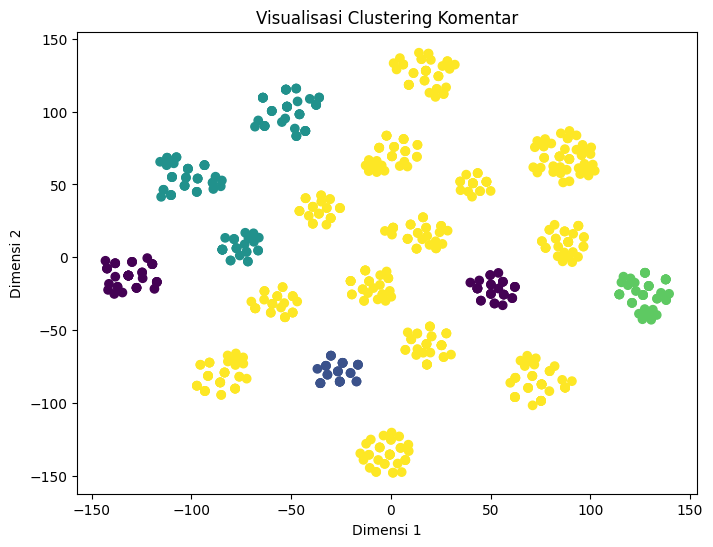

In [126]:
# Visualisasi Hasil Clustering

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df["cluster"])
plt.title("Visualisasi Clustering Komentar")
plt.xlabel("Dimensi 1")
plt.ylabel("Dimensi 2")
plt.show()


In [127]:
# Melihat Contoh Komentar per Cluster
for i in range(k):
    print(f"\nCluster {i}")
    print(df[df["cluster"] == i]["komentar"].head(5).values)



Cluster 0
['tilang mulu tapi jalan rusak gak diurus parah sih'
 'tilang mulu tapi jalan rusak gak diurus kok bisa ya'
 'tilang mulu tapi jalan rusak gak diurus udah rahasia umum'
 'tiap ada masalah ujungnya damai damai realita di lapangan'
 'tilang mulu tapi jalan rusak gak diurus']

Cluster 1
['polisi harusnya melindungi, bukan bikin takut serius deh'
 'polisi harusnya melindungi, bukan bikin takut miris banget'
 'polisi harusnya melindungi, bukan bikin takut miris banget'
 'polisi harusnya melindungi, bukan bikin takut bikin kesel'
 'polisi harusnya melindungi, bukan bikin takut realita di lapangan']

Cluster 2
['katanya melayani masyarakat, tapi kok malah nyusahin kok bisa ya'
 'katanya melayani masyarakat, tapi kok malah nyusahin'
 'katanya netral, tapi kelihatannya pilih kasih realita di lapangan'
 'katanya melayani masyarakat, tapi kok malah nyusahin kok bisa ya'
 'katanya netral, tapi kelihatannya pilih kasih serius deh']

Cluster 3
['keadilan terasa mahal buat rakyat biasa'
 '